<a href="https://colab.research.google.com/github/januarf12/GEOCING/blob/main/LogisticRegression_Susceptibilidad.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Wed May 13 21:14:03 2020

@author: Paul Goyes
@email : ypgoype@correo.uis.edu.co
          video sesion 7 link Drive: #########################################################################
@Modified_By: Ing. Felipe Riaño

@Comments:
- Las lineas modificables se marcan con el comentario: #Mod!
"""

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow.keras as kr
from numpy import round

In [ ]:
## Upload the X,y variables

""" Una variable 'X' con los valores para el muestreo en las diferentes variables
y una variable 'y' de salida, relacionada con la variable binaria dependiente """

#Montamos el dataframe de puntos 1/0 con sus valores de cada variable

url = "https://raw.githubusercontent.com/januarf12/GEOCING/main/Tabla_RL.csv" #Mod!

df = pd.read_csv(url)
df.head()

,FID,Shape *,Evento,PC1_woe,PC2_woe,V2X_woe,X1R_woe,X3R_woe
0,4,Point ZM,1,-0.431997,0.616158,-0.202755,0.165285,0.543944
1,7,Point ZM,1,0.965277,0.304827,1.262050,0.165285,0.083882
2,8,Point ZM,1,0.965277,0.304827,1.262050,0.165285,0.083882
3,9,Point ZM,1,0.965277,0.304827,1.262050,0.165285,0.083882
4,10,Point ZM,1,0.965277,0.304827,1.262050,0.165285,0.170430


In [ ]:
# Model variables
"""Creamos una lista con los encabezados del DF para decirle al código a partir de qué columnas debe extraer la información"""
feature_cols=['PC1_woe','PC2_woe','V2X_woe','X1R_woe','X3R_woe'] #Mod!
X = df[feature_cols].values
tamanio_Dataframe = X.shape #Calculamos el tamaño del DF para corroborar
# Separating out the target - Extraemos la columna binaria del DF para asignarla como la variable de salida
y = df["Evento"].values #Mod! Con el nombre de esa columna en el DF

print('Su tabla de datos cuenta con la siguiente dimensión: '+ str(tamanio_Dataframe))

Su tabla de datos cuenta con la siguiente dimensión: (855, 5)


In [ ]:
"""Se construye el modelo de regresión. Este bloque es fijo pero podrían variarse el método de solución para ver el cambio en 
los coeficientes calculados por cada modelo.
Este modelo aún no tiene los datos a predecir es lo que haremos a continuación-"""

# Build logistic model llamado : "logistic"
from sklearn.linear_model import LogisticRegression

#random_state=0
#multi_class='ovr'
#solver = 'newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'
logistic= LogisticRegression(random_state=0,
                             solver='newton-cg',
                             multi_class='ovr',
                             fit_intercept = True)

**FIT THE MODEL**

In [ ]:
# Fit the model including values
logistic = logistic.fit(X,y.reshape(-1,1).ravel()) #Verificador que ajusta las dimensiones de las variables
print(logistic.coef_,logistic.intercept_)

[[-0.62861826  0.93802421  0.85416603  0.5638891   0.84106938]] [1.33490086]


In [ ]:
# Check the model
""" Verificamos las predicciones del modelo con valores nuevos de cada variable
- Las entradas del modelo deben ser de 2D (por eso: [[]]) en el ejemplo pasamos un vector de dim[1,5]
"""
logistic.predict_proba([[0.01,1.02,1.2,0.1,0.1]])[:,1] # En esta linea estamos comprobando el valor de probabilidad para un punto especifico del espacio con una combinación determinada de valores en cada variable

array([0.9692578])

**ROC CURVE**

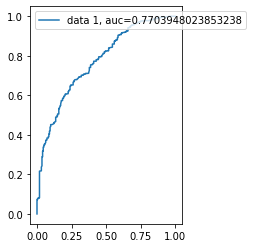

In [ ]:
"""
  Para validar el modelo no tenemos datos de validación (en este caso), usamos una curva ROC con los datos predichos por el modelo y los datos conocidos
"""

from sklearn import metrics
plt.subplot(122)
y_pred_proba = logistic.predict_proba(X)[:,1] #En esta linea vamos a predecir valores para todos los datos en X, es decir los mismos datos de entrada 
                                              #(la fn para encontrar esa probabilidad es un array con dos columnas y en la 0 se relaciona laa prob. de no ocurrencia por eso buscamos la columna 1)
fpr, tpr, _ = metrics.roc_curve(y,  y_pred_proba) #Comparamos los valores de los y reales con los resultados de los y predichos
auc = metrics.roc_auc_score(y, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=2)

****ESTADISTICOS DEL MODELO CALCULADO****

In [ ]:
"""
    Vamos a evaluar los resultados del modelo a través de una serie de estadisticos
"""
# Veamos una descripción resumida de los datos para cada variable
print(df.describe())

# Calculate matrix of predicted class probabilities.
predProbs = logistic.predict_proba(X)
print(logistic.classes_) # Check logistic.classes_ to make sure that sklearn ordered your classes as expected (0s y 1s)

# Design matrix -- add column of 1's at the beginning of your X_train matrix
X_design = np.hstack([np.ones((X.shape[0], 1)), X])

# Initiate matrix of 0's, fill diagonal with each predicted observation's variance
V = np.diagflat(np.product(predProbs, axis=1))

# Covariance matrix
# Note that the @-operater does matrix multiplication in Python 3.5+, so if you're running
# Python 3.5+, you can replace the covLogit-line below with the more readable:
# covLogit = np.linalg.inv(X_design.T @ V @ X_design)
covLogit = np.linalg.inv(np.dot(np.dot(X_design.T, V), X_design))
print("Covariance matrix: ", covLogit)

# Standard errors
print("Standard errors: ", np.sqrt(np.diag(covLogit)))

# Wald statistic (coefficient / s.e.) ^ 2
logitParams = np.insert(logistic.coef_, 0, logistic.intercept_)
print("Wald statistics: ", (logitParams / np.sqrt(np.diag(covLogit))) ** 2)

              FID      Evento     PC1_woe  ...     V2X_woe     X1R_woe     X3R_woe
count  855.000000  855.000000  855.000000  ...  855.000000  855.000000  855.000000
mean   427.000000    0.740351    0.309495  ...    0.112065    0.002323    0.104073
std    246.961535    0.438699    0.711766  ...    1.017811    0.454794    0.437948
min      0.000000    0.000000   -1.114440  ...   -2.221800   -1.121420   -0.809453
25%    213.500000    0.000000   -0.431997  ...   -0.657437    0.165285    0.083882
50%    427.000000    1.000000    0.496723  ...   -0.202755    0.165285    0.170430
75%    640.500000    1.000000    0.965277  ...    1.020940    0.281144    0.543944
max    854.000000    1.000000    0.965277  ...    7.644080    0.281144    0.543944

[8 rows x 7 columns]
[0 1]
Covariance matrix:  [[ 1.16181395e-02 -7.90365446e-03  4.01326360e-03  3.55804822e-03
   2.36992391e-03 -3.33639250e-04]
 [-7.90365446e-03  1.81214774e-02 -3.85791426e-03 -3.82638391e-03
  -4.00545357e-03 -2.42084684e-03]
 [ 

In [ ]:
print(V)

[[0.06649758 0.         0.         ... 0.         0.         0.        ]
 [0.         0.08585386 0.         ... 0.         0.         0.        ]
 [0.         0.         0.08585386 ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.19289269 0.         0.        ]
 [0.         0.         0.         ... 0.         0.24637364 0.        ]
 [0.         0.         0.         ... 0.         0.         0.17711299]]


In [ ]:
# build the optimization functions (functions for curve fitting)
from scipy.optimize import curve_fit
from scipy.optimize import least_squares

# list of bounds: each item is a tuple with the (lower, upper) bounds
def func(x,a,b):
    return 1 / (1+np.exp(-(a + b*x)))

popt, pcov = curve_fit(func, df.Hours.values, df.Pass.values)

print(popt)


In [ ]:
# fit the functions - perform optimization solution with least squares

def fun(x, t, y):
    return 1/(1+np.exp(-(x[0] + x[1]*t))) - y

x0 = np.ones(2)

res_lsq = least_squares(fun, x0, args=( df.Hours.values, df.Pass.values))

res_robust = least_squares(fun, x0, loss='cauchy', args=(df.Hours.values, df.Pass.values),
                           ftol=4e-10)


print("Resultados coeficientes con optimizacion \n",
      "Metodo ", "Intercepto ", "Coeficiente \n",
      "LS", round(res_lsq.x[0],4), round(res_lsq.x[1],4), "\n",
      "LS-ROBUST", round(res_robust.x[0],4),round(res_robust.x[1],4),"\n",
      "curve-fitting", round(popt[0],4),round(popt[1],4))


AttributeError: ignored

In [ ]:
#plot results

plt.figure()
plt.plot(df.Hours.values,fun(res_lsq.x,df.Hours.values,0),'r-',label='res-standard')
plt.plot(df.Hours.values,fun(res_robust.x,df.Hours.values,0),'b-',label='res-robust')
plt.plot(df.Hours.values,df.Pass.values,'ko',label='original data')
plt.legend()
plt.show()

AttributeError: ignored

<Figure size 432x288 with 0 Axes>

In [ ]:
func(2,popt[0],popt[1])

NameError: ignored

NameError: ignored

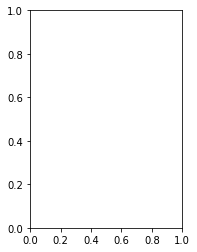

In [ ]:
from sklearn import metrics

plt.subplot(122)
y_pred_proba = func(X,popt[0],popt[1])
fpr, tpr, _ = metrics.roc_curve(y,  y_pred_proba)
auc = metrics.roc_auc_score(y, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)